In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [4]:
# pip install tensorflow

# Dataset Link
**Link**-->https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
dataset_path = "dataset"

In [7]:
# path  = r"dataset\test\bad\apple_bad\1.jpg"

In [8]:
# import cv2
# import numpy as np
# import warnings
# img = cv2.imread(path)
# print(img)

In [9]:
# # re-size all the images to this
# IMAGE_SIZE = [224, 224]

# train_path = 'train/'
# valid_path = 'val'



In [10]:
# img = cv2.imread(train_path)
# print(img)
# print()

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path =dataset_path +'/train'
valid_path = dataset_path +'/val'
test_path = dataset_path + '/test'

In [12]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [13]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [14]:
  # useful for getting number of output classes
folders = glob(train_path +'/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)


test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [20]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 36145 images belonging to 5 classes.


In [21]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20112 images belonging to 5 classes.


In [22]:
# test_set = test_datagen.flow_from_directory(test_path,
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

In [23]:
# pip install scipy


In [24]:
# fit the model
# Run the cell. It will take some time to execute
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import scipy


r = model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=3,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

C:\Users\deepp\AppData\Local\Temp\ipykernel_14888\1950217291.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
1130/1130 [==============================] - 2869s 3s/step - loss: 0.5627 - accuracy: 0.9502 - val_loss: 0.3037 - val_accuracy: 0.9790
Epoch 2/3
1130/1130 [==============================] - 2898s 3s/step - loss: 0.4471 - accuracy: 0.9724 - val_loss: 0.4314 - val_accuracy: 0.9757
Epoch 3/3
1130/1130 [==============================] - 3495s 3s/step - loss: 0.4455 - accuracy: 0.9782 - val_loss: 0.3615 - val_accuracy: 0.9859


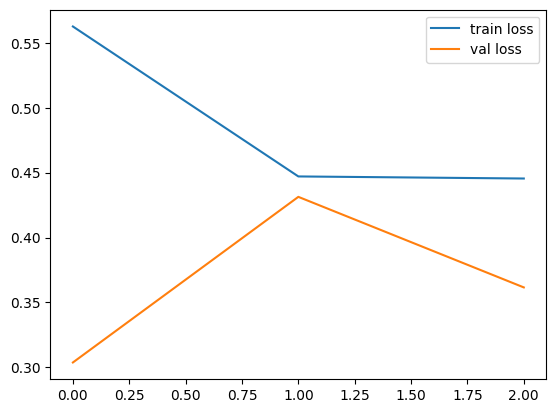

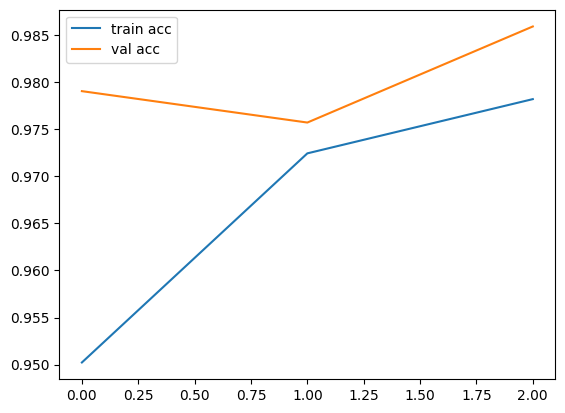

<Figure size 640x480 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:

# Print the final training and validation accuracy
final_train_accuracy = r.history['accuracy'][-1]
final_val_accuracy = r.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Training Accuracy: 0.9781712293624878
Final Validation Accuracy: 0.9858790636062622


In [27]:
# save it as a h5 file in inversion v3 model


from tensorflow.keras.models import load_model

model.save('rice_model.h5')

d:\Codebook\Deep_Learning\fruit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
#load the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [4]:
model=load_model('rice_model.h5')

# img=image.load_img("/content/drive/MyDrive/notebook/dataset/test/Potato___Early_blight/fa8656fd-03b1-467c-a877-99ce5632d580___RS_Early.B 7630.JPG")


In [5]:
ref = dict(zip(list(train_set.class_indices.values()),list(train_set.class_indices.keys())))

NameError: name 'train_set' is not defined

In [31]:
# def prediction(path):
#   img = image.load_img(path, target_size=(224, 224))
#   i = image.img_to_array(img)
#   i = np.expand_dims(i, axis=0)
#   img = preprocess_input(i)
#   pred = np.argmax(model.predict(img), axis=1)
#   print(f"the image belongs to {ref[pred]}")

In [32]:
# path = r"dataset\test\bad\banana_bad\3.jpg"
# prediction(path)

In [33]:
train_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [1]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)
  print(f"the image belongs to {ref[pred[0]]}")
path = r"dataset\train\Arborio\Arborio (5).jpg"
prediction(path)


NameError: name 'image' is not defined

# prediction as input image

In [6]:
#load the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [7]:
# load the model
# model=load_model(r"D:\Codebook\fruit_quality_prediction\model_inception.h5")
model = load_model('rice_model.h5')


In [13]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)
  print(f"the image belongs to {[pred[0]]}")

# path = r"dataset\train\Arborio\Arborio (5).jpg"
# path = r"dataset\train\Basmati\Basmati (8391).jpg"
# path = r"dataset\train\Ipsala\Ipsala (15).jpg"
# path = r"dataset\train\Jasmine\Jasmine (10).jpg"
path = r"dataset\train\Karacadag\Karacadag (102).jpg"

prediction(path)



# {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

1/1 [==============================] - 0s 83ms/step
the image belongs to [4]


In [ ]:
# prediction with display images

1/1 [==============================] - 1s 1s/step


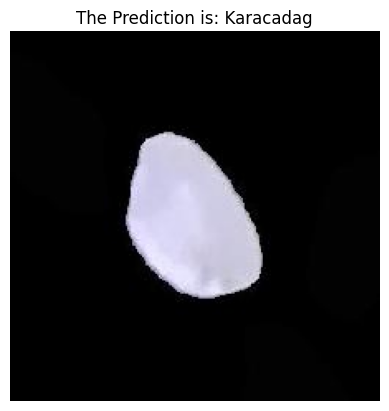

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
model=load_model(r"rice_model.h5")

def predict_and_display(image_path, model, class_labels):
    
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"The Prediction is: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('rice_model.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = [ 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'
]

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = r"dataset\train\Karacadag\Karacadag (102).jpg"
predict_and_display(image_path_to_test, model, class_labels)

# two model combine run

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np

def predict_fruit_quality_and_type(image_path):
    # Load the fruit quality model
    fruit_quality_model = load_model('model_inception.h5')
    
    # Load the fruit type classification model
    fruit_type_model = load_model(r"D:\Codebook\fruit_quality_prediction\classify fruit\model_classifyv3.h5")
    
    # Define labels for fruit quality and fruit type
    fruit_quality_labels = {
        0: 'Bad Fruit Quality',
        1: 'Good Fruit Quality'
    }
    
    fruit_type_labels = {
        0: 'apple',
        1: 'banana',
        2: 'guava',
        3: 'lime',
        4: 'orange',
        5: 'pomegranate'
    }
    
    # Load and preprocess the image for both models
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Predict fruit quality
    fruit_quality_pred = np.argmax(fruit_quality_model.predict(img_array), axis=1)
    
    # Predict fruit type
    fruit_type_pred = np.argmax(fruit_type_model.predict(img_array), axis=1)
    
    # Get the corresponding labels
    fruit_quality_result = fruit_quality_labels[fruit_quality_pred[0]]
    fruit_type_result = fruit_type_labels[fruit_type_pred[0]]
    
    return {
        'Fruit Quality': fruit_quality_result,
        'Fruit Type': fruit_type_result
    }

# image_path = r"dataset\test\good\guava_good\3.JPG"
image_path = r"dataset\test\bad\banana_bad\2.jpg"
results = predict_fruit_quality_and_type(image_path)
print(results)


1/1 [==============================] - 1s 1s/step
{'Fruit Quality': 'Bad Fruit Quality', 'Fruit Type': 'banana'}
